#Q2

In [ ]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

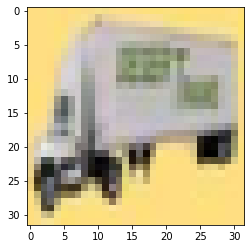

In [ ]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(512, activation='relu'))
fc_model.add(keras.layers.Dense(128, activation='relu'))
fc_model.add(keras.layers.Dense(num_classes, activation='softmax'))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


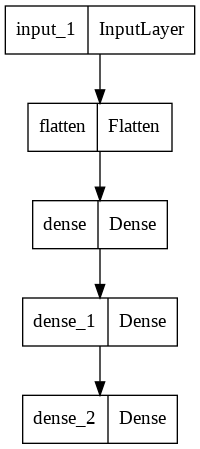

In [ ]:
plot_model(fc_model)

In [ ]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
Conv_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D())

Conv_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
Conv_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D())

Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(512, activation='relu'))
Conv_model.add(keras.layers.Dense(num_classes, activation='softmax'))
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

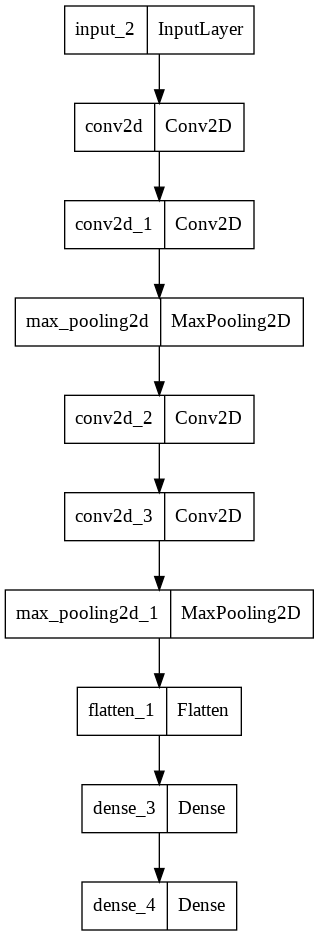

In [ ]:
plot_model(Conv_model)

In [ ]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9242 - accuracy: 0.3130
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7128 - accuracy: 0.3836
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6416 - accuracy: 0.4113
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5959 - accuracy: 0.4258
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5739 - accuracy: 0.4356


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.5561 - accuracy: 0.4457


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 14s 5ms/step - loss: 1.4844 - accuracy: 0.4595
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0793 - accuracy: 0.6184
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8929 - accuracy: 0.6851
Epoch 4/5
1563/1563 [==

#Q3

In [ ]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!rm -r sample_data

In [ ]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:13<00:00, 43.3MB/s]


In [ ]:
!unzip -q fruits-360-original-size.zip

## A : complete resize image

In [ ]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [ ]:
def resize_img(img, desired_size = 224):
    # write your code here
    h, w = img.shape[:2]
    if h == w:
        return cv2.resize(img, (desired_size, desired_size))
    s = max(h, w)
    new_img = np.zeros((s, s, 3)).astype(np.uint8)
    ax, ay = (s - img.shape[1])//2, (s - img.shape[0])//2
    new_img[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    new_img = cv2.resize(new_img, (desired_size, desired_size))
    return new_img

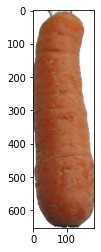

In [ ]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

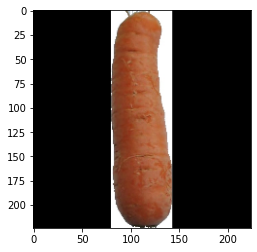

In [ ]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [ ]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [ ]:
# YOU CAN CHANGE IT
EPOCHS = 20

In [ ]:
# Write your code here
resnet = tf.keras.applications.ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), classes=24)
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/20
65/65 [==============================] - 85s 1s/step - loss: 0.7061 - acc: 0.7987
Epoch 2/20
65/65 [==============================] - 65s 996ms/step - loss: 0.1441 - acc: 0.9538
Epoch 3/20
65/65 [==============================] - 66s 1s/step - loss: 0.0780 - acc: 0.9769
Epoch 4/20
65/65 [==============================] - 67s 1s/step - loss: 0.0604 - acc: 0.9846
Epoch 5/20
65/65 [==============================] - 66s 1s/step - loss: 0.0111 - acc: 0.9970
Epoch 6/20
65/65 [==============================] - 67s 1s/step - loss: 0.0285 - acc: 0.9909
Epoch 7/20
65/65 [==============================] - 66s 1s/step - loss: 0.0387 - acc: 0.9875
Epoch 8/20
65/65 [==============================] - 65s 999ms/step - loss: 0.0164 - acc: 0.9939
Epoch 9/20
65/65 [==============================] - 69s 1s/step - loss: 0.0258 - acc: 0.9926
Epoch 10/20
65/65 [==============================] - 66s 1s/step - loss: 0.0266 - acc: 0.9926
Epoch 11/20
65/65 [==============================] - 66s 1s/ste

## C : Fine-tune Resnet50 on fruits dataset.

In [ ]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
conv_base = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
fine_tune_resnet.add(conv_base)
fine_tune_resnet.add(tf.keras.layers.Flatten())
fine_tune_resnet.add(tf.keras.layers.Dense(256, activation='relu'))
fine_tune_resnet.add(tf.keras.layers.Dense(24, activation='softmax'))

conv_base.trainable = False

fine_tune_resnet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 24)                6168      
                                                                 
Total params: 49,284,248
Trainable params: 25,696,536
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/20
65/65 [==============================] - 35s 500ms/step - loss: 5.1150 - acc: 0.3646
Epoch 2/20
65/65 [==============================] - 33s 497ms/step - loss: 0.9866 - acc: 0.7570
Epoch 3/20
65/65 [==============================] - 33s 501ms/step - loss: 0.5361 - acc: 0.8788
Epoch 4/20
65/65 [==============================] - 33s 504ms/step - loss: 0.3309 - acc: 0.9400
Epoch 5/20
65/65 [==============================] - 33s 508ms/step - loss: 0.2410 - acc: 0.9575
Epoch 6/20
65/65 [==============================] - 33s 505ms/step - loss: 0.1933 - acc: 0.9620
Epoch 7/20
65/65 [==============================] - 33s 501ms/step - loss: 0.1566 - acc: 0.9705
Epoch 8/20
65/65 [==============================] - 33s 502ms/step - loss: 0.1304 - acc: 0.9745
Epoch 9/20
65/65 [==============================] - 33s 504ms/step - loss: 0.1072 - acc: 0.9806
Epoch 10/20
65/65 [==============================] - 34s 521ms/step - loss: 0.0957 - acc: 0.9835
Epoch 11/20
65/65 [====================

## Test models

In [ ]:
resnet.evaluate(test_generator)

33/33 [==============================] - 19s 549ms/step - loss: 14.3637 - acc: 0.1968


[14.363670349121094, 0.19678457081317902]

In [ ]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 17s 483ms/step - loss: 0.0183 - acc: 1.0000


[0.018269604071974754, 1.0]